# Homework #4: Gaussian Process Regression

Janelle Sy

November 28, 2022


In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import pickle as pkl
from scipy import optimize

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


***Fit the famous data set 11 from Problem Set 2, but now with a single Gaussian Process. Choose as your kernel the Matern 3/2 kernel. Use the form of the GP regression shown in class, that involves both the kernel matrix K and the noise covariance C. Plot the GP result by evaluating the GP on a set of test locations which is a fine grid of spacing (say) 0.1 days over a footprint that goes from -50 days to 1075 days (ie, more than the span of the data). Plot the GP result for three different (but all reasonable) values for the Matern kernel width (the hyper-parameter).***


Notes to self:

$\hat{Y_{\ast}} = K_{\ast}(K + C)^{-1} Y$

where $K$ is the Matern 3/2 kernel and $K_{\ast}$ is the same except it is the rectangular kernel matrix between test locations $t_{\ast}$ and training locations $t_{i}$

In [2]:
with open("data.pkl", "rb") as handle:
    data = pkl.load(handle).T
    
# data[0] is the array of times 
# data[1] is the array of uncertainties 
time = data[0]
sigma_y = data[1]
Y = data[12]

In [3]:
# matern 3/2 kernel

def matern(t, tau, sigma):
    return sigma**2*(1 + np.sqrt(3)*np.abs(t)/tau)*np.exp(-1*np.sqrt(3)*np.abs(t)/tau)

In [4]:
# matern 3/2 kernel

def matern(t_1, t_2, tau, sigma):
    return sigma**2*(1 + np.sqrt(3)*np.abs(t_1[:, None] - t_2[None, :])/tau)*np.exp(-1*np.sqrt(3)*np.abs((t_1[:, None] - t_2[None, :]))/tau)

In [5]:
# evaluate GP on test locations --> this is k_star
t_star = np.arange(-50, 1075, 0.1)[:,None]
t_test = t_star - time

# k_star is generally a rectangular matrix
# this kernel is for TEST LOCATIONS
k_star1 = matern(t_star, time, 300, 0.8)
k_star2 = matern(t_star, time, 30, 0.8)
k_star3 = matern(t_star, time, 3, 0.8)


# k( t_i - t_j )
k_1 = matern(time, time, 300, 0.8)
k_2 = matern(time, time, 30, 0.8)
k_3 = matern(time, time, 3, 0.8)



In [6]:
# Y* hat is our mean prediction
def predict(k_star, k, sigma_y, time, Y):
    C = np.diag(sigma_y**2)
    C_inv = np.linalg.solve(C, np.identity(len(time)))

    # k is an nxn matrix!
    mid = (k + C)
    mid_inv = np.linalg.solve(mid, np.identity(len(Y)))
    
    y_star_hat = k_star@mid_inv@Y
    
    return y_star_hat

In [7]:
y_star_hat1 = predict(k_star1, k_1, sigma_y, time, Y)
y_star_hat2 = predict(k_star2, k_2, sigma_y, time, Y)
y_star_hat3 = predict(k_star3, k_3, sigma_y, time, Y)

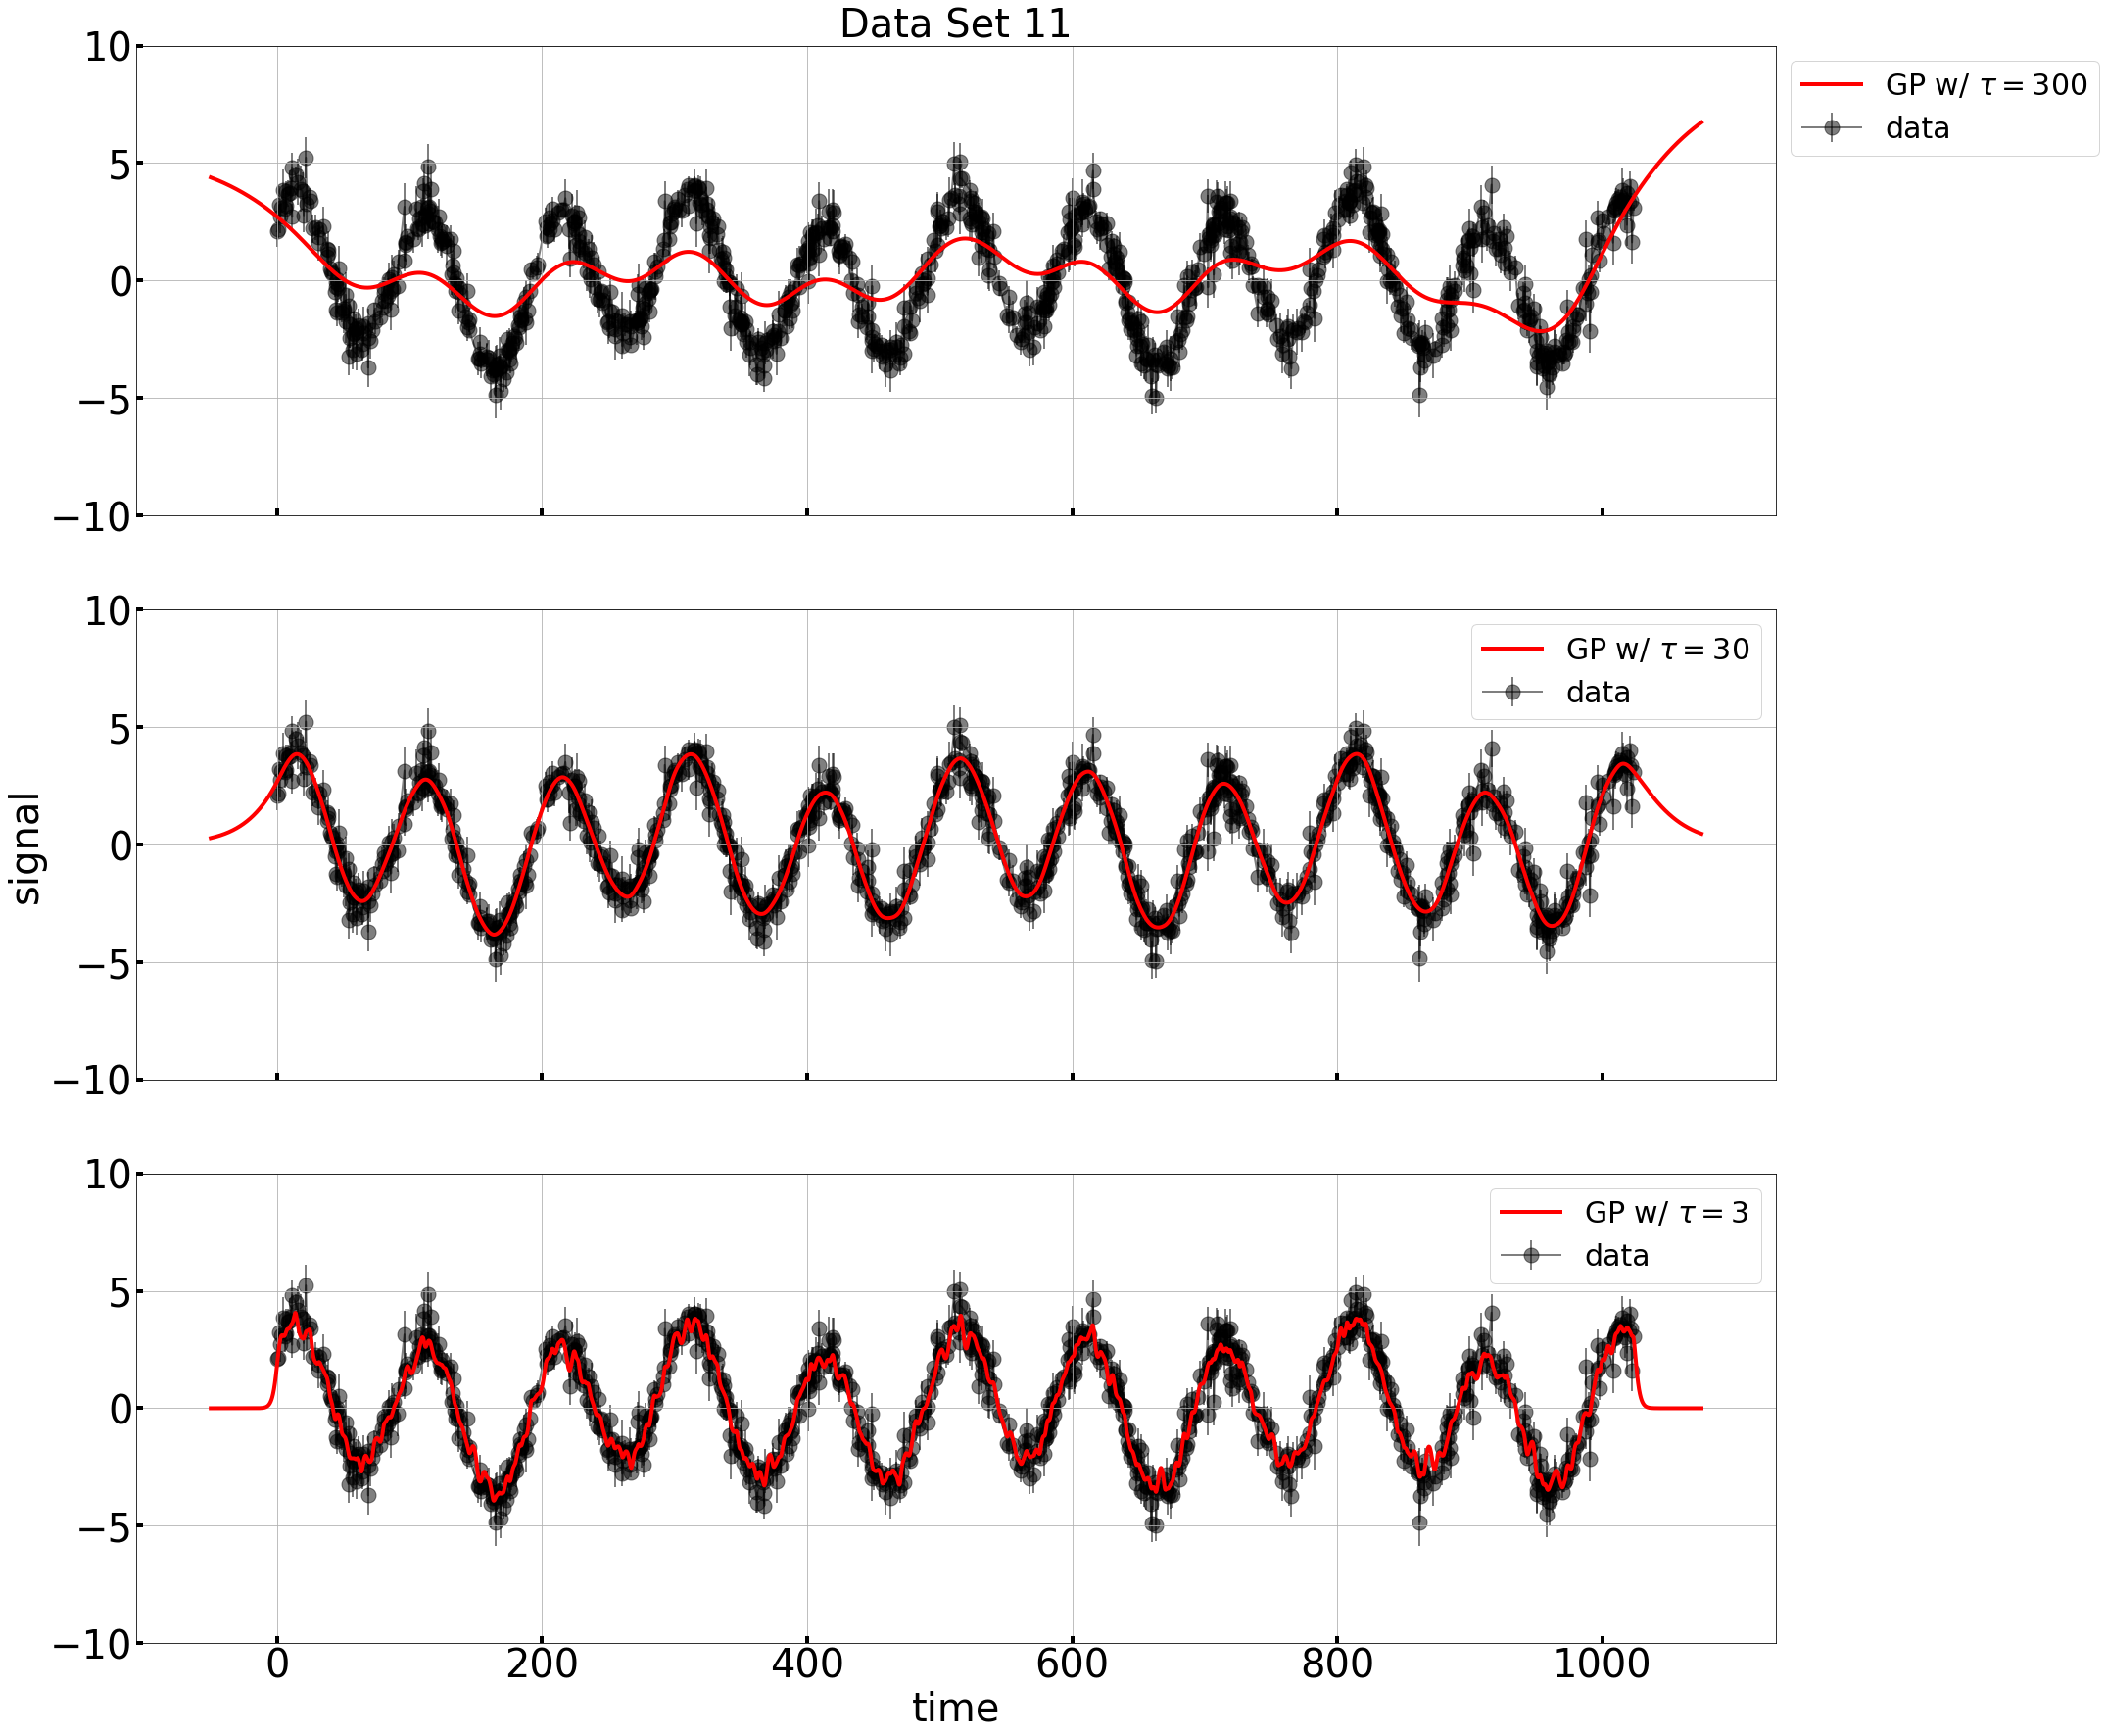

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 30), sharex=True, sharey=True)
axes[0].set_title('Data Set 11', fontsize = 40)
axes[1].set_ylabel('signal', fontsize = 40)

axes[0].tick_params(labelsize=40, width=4., length=7., direction='in')
axes[1].tick_params(labelsize=40, width=4., length=7., direction='in')
axes[2].tick_params(labelsize=40, width=4., length=7., direction='in')


axes[0].errorbar(time, Y, yerr = sigma_y, linewidth = 2, markersize = 15, color="k", marker="o", alpha=0.5, label = 'data', zorder = 1)
axes[0].plot(t_star, y_star_hat1, linewidth=4, color = 'r', label = r'GP w/ $\tau = 300$', zorder = 2)
axes[0].set_ylim(-10,10)
axes[0].grid()
axes[0].legend(bbox_to_anchor = (1,1), fontsize = 30)

axes[1].errorbar(time, Y, yerr = sigma_y, linewidth = 2, markersize = 15, color="k", marker="o", alpha=0.5, label = 'data',  zorder = 1)
axes[1].plot(t_star, y_star_hat2, linewidth=4, color = 'r', label = r'GP w/ $\tau = 30$', zorder = 2)
axes[1].set_ylim(-10,10)
axes[1].grid()
axes[1].legend(bbox_to_anchor = (1,1), fontsize = 30)

axes[2].errorbar(time, Y, yerr = sigma_y, linewidth = 2, markersize = 15, color="k", marker="o", alpha=0.5, label = 'data',  zorder = 1)
axes[2].plot(t_star, y_star_hat3, linewidth=4, color = 'r', label = r'GP w/ $\tau = 3$', zorder = 2)
plt.xlabel('time', fontsize = 40)
axes[2].set_ylim(-10,10)
axes[2].grid()
axes[2].legend(bbox_to_anchor = (1,1), fontsize = 30)

plt.show()

Note: As $\tau$ gets smaller our gaussian process fits get better!